# 신생아 이름
- 1880년부터 가장 빈도가 높은 신생아 이름에 대한 정보
- 이 데이터를 이용해서 여러 가지 분석을 할 수 있음
       - 시대별로 특정 이름이 차지하는 비율을 구해 얼마나 흔한 이름인지 알아보기
       - 이름의 상대 순위 알아보기
       - 각 연도별로 가장 인기 있는 이름, 가장 많이 증가하거나 감소한 이름 알아보기
       - 모음, 자음, 길이, 전체 다양성, 철자 변화, 첫 글자와 마지막 글자 등 이름 유행 분석하기
       - 성서에 등장하는 이름, 유명인, 인구통계학적 변화 등 외부 자료를 통한 유행 분석

In [1]:
import pandas as pd

## 1. 데이터 읽기

In [2]:
names1880 = pd.read_csv('./pydata-book-2nd-edition/datasets/babynames/yob1880.txt',
                       names=['name', 'sex', 'births'])

names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
# 이 데이터는 각 연도별로 최소 5명 이상 중복되는 이름만 포함하고 있는 것을 알 수 있다.
names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


- 편의상 성별별 출생수를 모두 합한 값을 해당 연도의 전체 출생수라 함

In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## 2.데이터 합치기
- 데이터가 여러개의 txt 파일로 나눠져 있어 모든 데이터를 DataFrame 하나로 모은다.
- DataFrame에 year 항목을 추가

In [5]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './pydata-book-2nd-edition/datasets/babynames/yob%d.txt'%year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 하나의 Dataframe으로 합치기
# 로우의 순서를 몰라도 되니 concat 함수의 ignore_index=True를 인자로 전달
names = pd.concat(pieces, ignore_index=True)

In [6]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


### groupby나 pivot_table을 이용해서 연도나 성별에 따른 데이터를 수집

In [7]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


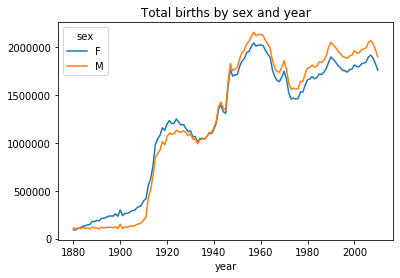

In [8]:
total_births.plot(title='Total births by sex and year')

## 3. 각 연도별/성별에 따른 선호하는 이름 1000개 추출

### 3.1 연도와 성별로 그룹화 & prob 컬럼 추가

#### prob 컬럼을 추가
- prob 컬럼을 추가해서 각 이름이 전체 출생수에서 차지하는 비율을 계산
- e.g. prob 값이 0.02라면 100명의 아기 중 2명의 이름이 같다는 뜻
- 데이터를 연도와 성별로 그룹화 하고 각 그룹에 새 컬럼을 추가

In [9]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


#### prop 컬럼의 합이 1인지 확인
- 비율이기 때문에 합이 1이 되어야 한다.

In [10]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

### 3.2 각 연도별/성별에 따른 선호하는 이름 1000개 추출

#### 함수로 구현

In [11]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [12]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [13]:
# 그룹 색인은 필요없으므로 삭제
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


#### 함수를 사용하지 않고 구현 방법

In [14]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## 4. 이름 유행 분석

### 4.1 상위 1000개의 데이터를 남자아이와 여자아이로 분리

In [15]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [16]:
boys.head()

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392


In [17]:
girls.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
total_births = top1000.pivot_table('births', index='year',
                                  columns='name',
                                  aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [19]:
total_births.tail()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN
2009,1265.0,4352.0,270.0,7936.0,NaN,NaN,296.0,NaN,307.0,369.0,...,NaN,5120.0,3981.0,496.0,NaN,NaN,NaN,NaN,NaN,NaN
2010,448.0,4628.0,438.0,7374.0,226.0,NaN,277.0,NaN,295.0,324.0,...,NaN,6200.0,5164.0,504.0,NaN,NaN,NaN,NaN,NaN,258.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000251660F9748>,
      dtype=object)

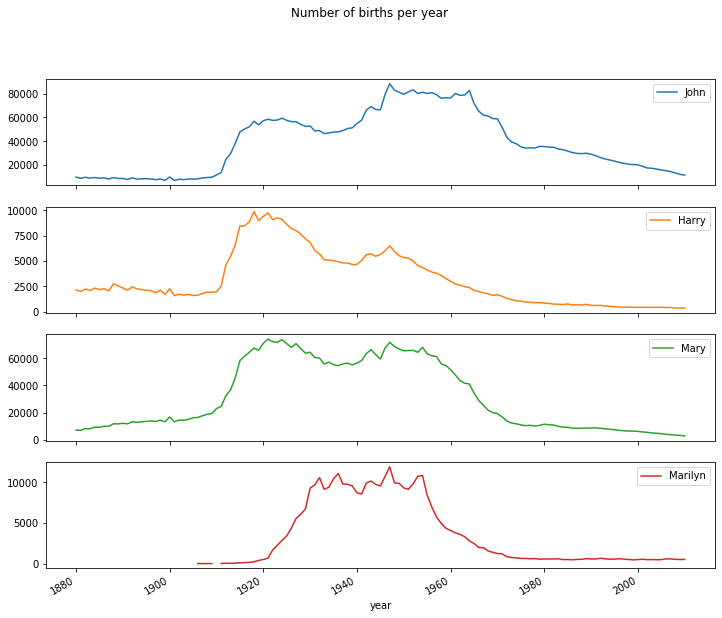

In [20]:
# DataFrame의 plot 메서드로 몇몇 이름의 추이를 그래프로 확인
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title='Number of births per year')

### 4.2 다양한 이름을 사용하는 경향 측정하기

- 인기 있는 이름 1000개가 전체 출생수에서 차지하는 비율을 연도별/성별 그래프로 그리기
- 그래프에서 상위 1000개의 이름에서 비율의 총합이 감소하는 것을 볼 수 있다.
    - 이를 통해 이름의 다양성이 증가하고 있음을 알 수 있다.

In [21]:
import numpy as np

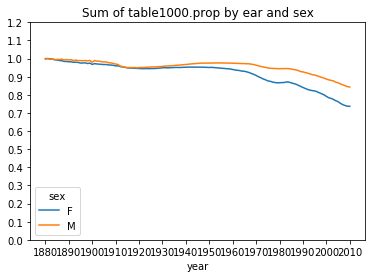

In [22]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex' ,aggfunc=sum)
table.plot(title='Sum of table1000.prop by ear and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [23]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


#### 4.2.1 인기 있는 이름순으로 정렬했을 때 전체 출생수의 50%를 차지하는 이름수

In [24]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


**prop의 누계를 cumsum에 저장하고 searchsorted 메서드를 호출해서 정렬된 상태에서 누계가 0.5가 되는 위치를 구함**

In [25]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [26]:
# 배열의 색인은0부터 시작하기 때문에 결과 1을 더해준다.
prop_cumsum.values.searchsorted(0.5) + 1

117

In [27]:
df  = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

#### 4.2.2 위의 연산을 각 연도별/성별 조합에 적용
- 연도와 성을 groupby로 묶고 각 그룹에 apply를 사용해서 이 연산을 적용

In [28]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [29]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


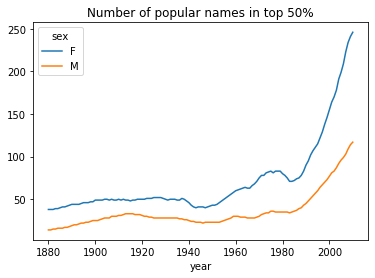

In [30]:
diversity.plot(title='Number of popular names in top 50%')

## 5. 마지막 글자의 변화
- 연도, 성별, 이름의 마지막 글자를 수집하여 분석

### 5.1 마지막 글자 비율 구하기

In [31]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  

[5 rows x 262 columns]

전체 기간 중 세 지점을 골라 이름의 마지막 글자 몇 개를 출력(1910, 1960, 2010)

In [32]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

### 정규화
전체 출생수에서 성별별로 각각의 마지막 글자가 차지하는 비율을 계산하기 위해 전체 출생수로 정규화

In [33]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [34]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

### 5.2 마지막 글자 비율로 성별과 출생 연도에 대한 그래프
- 그래프를 통해 'n'으로 끝나는 남자아이 이름의 빈도가 1960년도 이후에 급격하게 증가한 걸 알 수 있다.

In [35]:
import matplotlib.pyplot as plt

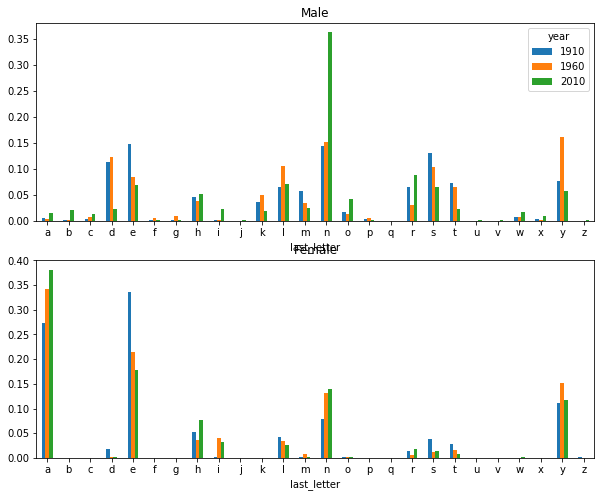

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

### 5.3. 전체 데이터에 대한 출생연도와 성별, 남자아이 이름에서 몇가지 글자로 정규화하고 시계열 데이터로 변환

In [37]:
letter_prop = table /table.sum()
# T는 전치행렬
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


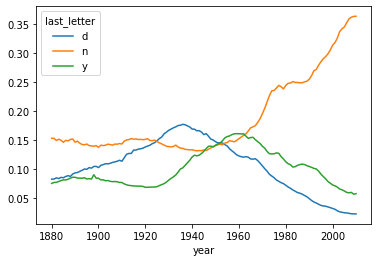

In [38]:
dny_ts.plot()

## 6.남자 이름과 여자 이름이 바뀐 경우
남자 이름으로 선호되다가 현재는 여자 이름으로 선호되는 경우가 있다.

### 6.1 top1000 데이터를 이용해서 'lesl'로 시작하는 이름을 포함하는 목록 만들기

In [39]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

#### 6.1.1 이름별 출생수를 구하고 상대도수 확인

In [40]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

#### 6.1.2 성별과 연도별로 모은 다음 출생연도로 정규화

In [41]:
table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc='sum')

table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


### 6.2 시대별로 성별에 따른 명세를 그래프

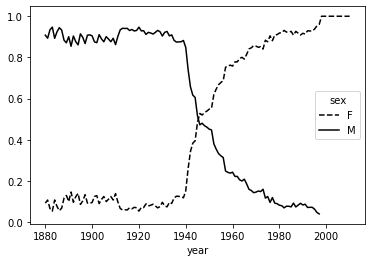

In [42]:
table.plot(style={'M': 'k-', 'F': 'k--'})